We have a battery dataset extracted from the materials project database using mpi key. This battery database contains material id (cathode materials for metal ion battery), battery formula, working ion along with their properties for example voltage, capacity, energy density of those cathode materials. In this note book we will try to fit various ML model with the voltage of these cathode materials and try to predict the voltage for unknown cathode materials.


Link of Materials Project database:

https://next-gen.materialsproject.org/

The elemental features have been generated from the following paper

**DOI:** 10.1021/acs.chemmater.0c01907

In [ ]:
#Upload the data and read the dataframe with the help of Pandas
import pandas as pd
df = pd.read_excel('/content/Battery_data.xlsx')
df

,battery_id,host_material_id,battery_formula,framework_formula,chemsys,formula_anonymous,working_ion,nelements,sum_Atomic_Number_WI,sum_ionic_radius_WI,sum_Pauling_Electronegativity_WI,sum_valence_s_WI,sum_Atomic_Number,sum_Atomic_Radius,sum_number_of_valence_electrons,sum_valence_s,sum_valence_p,sum_Pauling_Electronegativity,average_voltage
0,mp-754407_Li,mp-756094,Li1-2FeS2,FeS2,Fe-S,AB2,Li,2,3,1.45,0.98,1,58,3.32,20,6,8,6.99,1.003098
1,mp-1045431_Zn,mp-1390701,Zn0-0.5CoS2,CoS2,Co-S,AB2,Zn,2,30,1.35,1.65,2,59,3.28,21,6,8,7.04,1.004731
2,mp-7564_Rb,mp-7564,Rb0-0.5Nb3Te4,Nb3Te4,Nb-Te,A3B4,Rb,2,37,2.35,0.82,1,331,10.86,39,11,16,13.20,1.012185
3,mp-1041415_Zn,mp-1047798,Zn0-0.5CuMoO4,CuMoO4,Cu-Mo-O,ABC4,Zn,3,30,1.35,1.65,2,103,5.27,41,10,16,17.82,1.012876
4,mp-1043107_Zn,mp-1043472,Zn0-1NiMoP2O9,NiMoP2O9,Mo-Ni-O-P,ABC2D9,Zn,4,30,1.35,1.65,2,172,9.67,80,25,42,39.41,1.026482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,mp-752973_Li,mp-1385977,Li0-1MnF4,MnF4,F-Mn,AB4,Li,2,3,1.45,0.98,1,61,3.29,35,10,20,17.47,6.952880
3911,mp-26449_Li,mp-26450,Li0-1NiP2O7,NiP2O7,Ni-O-P,AB2C7,Li,3,3,1.45,0.98,1,114,6.81,62,20,34,30.37,7.475388
3912,mp-759090_Na,mp-1047121,Na0-0.5CrO2,CrO2,Cr-O,AB2,Na,2,11,1.80,0.93,1,40,2.62,18,5,8,8.54,7.505595
3913,mp-770684_Li,mp-1047121,Li0-0.5CrO2,CrO2,Cr-O,AB2,Li,2,3,1.45,0.98,1,40,2.62,18,5,8,8.54,7.824564


There are 4337 number of rows 19 number of columns. Let's see what are the columns present in the dataframe

In [ ]:
df.columns

Index(['battery_id', 'host_material_id', 'battery_formula',
       'framework_formula', 'chemsys', 'formula_anonymous', 'working_ion',
       'nelements', 'sum_Atomic_Number_WI', 'sum_ionic_radius_WI',
       'sum_Pauling_Electronegativity_WI', 'sum_valence_s_WI',
       'sum_Atomic_Number', 'sum_Atomic_Radius',
       'sum_number_of_valence_electrons', 'sum_valence_s', 'sum_valence_p',
       'sum_Pauling_Electronegativity', 'average_voltage'],
      dtype='object')

The last column i.e., **average_voltage** ***(y)*** is the target variable and
the rest of the columns are features ***(x)***

Check the data type of each column

In [ ]:
df.dtypes

battery_id                           object
host_material_id                     object
battery_formula                      object
framework_formula                    object
chemsys                              object
formula_anonymous                    object
working_ion                          object
nelements                             int64
sum_Atomic_Number_WI                  int64
sum_ionic_radius_WI                 float64
sum_Pauling_Electronegativity_WI    float64
sum_valence_s_WI                      int64
sum_Atomic_Number                     int64
sum_Atomic_Radius                   float64
sum_number_of_valence_electrons       int64
sum_valence_s                         int64
sum_valence_p                         int64
sum_Pauling_Electronegativity       float64
average_voltage                     float64
dtype: object

There are three type of data present in the database, object, int64, float64. The cloumns which contains object type data those are called categorical feature and the columns which contains int64 and float64 type data are known as numerical features. Since ML models don't understand categorical features if we want to use those features we need to represent those features in some numerical format. These can be done by several methods. One of the popular method is one hot encoding. If we don't want to use thode categorical features we can simply drop those features from the feature space.

In [ ]:
df1 = df.drop(['battery_id', 'host_material_id', 'battery_formula', 'framework_formula', 'chemsys', 'formula_anonymous'], axis=1)
df1.columns

Index(['working_ion', 'nelements', 'sum_Atomic_Number_WI',
       'sum_ionic_radius_WI', 'sum_Pauling_Electronegativity_WI',
       'sum_valence_s_WI', 'sum_Atomic_Number', 'sum_Atomic_Radius',
       'sum_number_of_valence_electrons', 'sum_valence_s', 'sum_valence_p',
       'sum_Pauling_Electronegativity', 'average_voltage'],
      dtype='object')

In [ ]:
df1.head(10)

,working_ion,nelements,sum_Atomic_Number_WI,sum_ionic_radius_WI,sum_Pauling_Electronegativity_WI,sum_valence_s_WI,sum_Atomic_Number,sum_Atomic_Radius,sum_number_of_valence_electrons,sum_valence_s,sum_valence_p,sum_Pauling_Electronegativity,average_voltage
0,Li,2,3,1.45,0.98,1,58,3.32,20,6,8,6.99,1.003098
1,Zn,2,30,1.35,1.65,2,59,3.28,21,6,8,7.04,1.004731
2,Rb,2,37,2.35,0.82,1,331,10.86,39,11,16,13.20,1.012185
3,Zn,3,30,1.35,1.65,2,103,5.27,41,10,16,17.82,1.012876
4,Zn,4,30,1.35,1.65,2,172,9.67,80,25,42,39.41,1.026482
5,Li,2,3,1.45,0.98,1,38,2.72,16,6,8,8.42,1.026650
6,Li,3,3,1.45,0.98,1,78,5.34,34,11,16,16.96,1.030354
7,Ca,3,20,1.80,1.00,2,238,15.92,116,42,68,61.54,1.030481
8,Mg,3,12,1.50,1.31,2,479,17.83,129,35,48,56.42,1.031671
9,Y,2,39,1.85,1.22,2,39,2.67,17,6,8,8.51,1.033525


In [ ]:
# Applying one-hot encoding in the working_ion column
one_hot_encoded = pd.get_dummies(df1['working_ion'])

# Concatenating the one-hot encoded columns with the original DataFrame
df1_encoded = pd.concat([df1, one_hot_encoded], axis=1)

# Dropping the original 'working_ion' column if needed
# df_encoded = df_encoded.drop('working_ion', axis=1)

df1_encoded


,working_ion,nelements,sum_Atomic_Number_WI,sum_ionic_radius_WI,sum_Pauling_Electronegativity_WI,sum_valence_s_WI,sum_Atomic_Number,sum_Atomic_Radius,sum_number_of_valence_electrons,sum_valence_s,...,Al,Ca,Cs,K,Li,Mg,Na,Rb,Y,Zn
0,Li,2,3,1.45,0.98,1,58,3.32,20,6,...,0,0,0,0,1,0,0,0,0,0
1,Zn,2,30,1.35,1.65,2,59,3.28,21,6,...,0,0,0,0,0,0,0,0,0,1
2,Rb,2,37,2.35,0.82,1,331,10.86,39,11,...,0,0,0,0,0,0,0,1,0,0
3,Zn,3,30,1.35,1.65,2,103,5.27,41,10,...,0,0,0,0,0,0,0,0,0,1
4,Zn,4,30,1.35,1.65,2,172,9.67,80,25,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,Li,2,3,1.45,0.98,1,61,3.29,35,10,...,0,0,0,0,1,0,0,0,0,0
3911,Li,3,3,1.45,0.98,1,114,6.81,62,20,...,0,0,0,0,1,0,0,0,0,0
3912,Na,2,11,1.80,0.93,1,40,2.62,18,5,...,0,0,0,0,0,0,1,0,0,0
3913,Li,2,3,1.45,0.98,1,40,2.62,18,5,...,0,0,0,0,1,0,0,0,0,0


By appling One-Hot-Encoding the objects are become columns. For example Al is now a column. If Al is a working ion for a material then the value will be 1 if not then the value will be 0. Similarly for rest of the 9 metal ions

Now we can drop the 'working_ion' column

In [ ]:
df2 = df1_encoded.drop(['working_ion'], axis=1)
df2.tail(10)

,nelements,sum_Atomic_Number_WI,sum_ionic_radius_WI,sum_Pauling_Electronegativity_WI,sum_valence_s_WI,sum_Atomic_Number,sum_Atomic_Radius,sum_number_of_valence_electrons,sum_valence_s,sum_valence_p,...,Al,Ca,Cs,K,Li,Mg,Na,Rb,Y,Zn
3905,2,20,1.80,1.00,2,64,3.17,38,10,20,...,0,1,0,0,0,0,0,0,0,0
3906,3,11,1.80,0.93,1,91,5.35,57,18,36,...,0,0,0,0,0,0,1,0,0,0
3907,3,3,1.45,0.98,1,199,11.94,103,32,59,...,0,0,0,0,1,0,0,0,0,0
3908,3,3,1.45,0.98,1,265,16.96,143,50,87,...,0,0,0,0,1,0,0,0,0,0
3909,4,3,1.45,0.98,1,82,4.88,44,14,24,...,0,0,0,0,1,0,0,0,0,0
3910,2,3,1.45,0.98,1,61,3.29,35,10,20,...,0,0,0,0,1,0,0,0,0,0
3911,3,3,1.45,0.98,1,114,6.81,62,20,34,...,0,0,0,0,1,0,0,0,0,0
3912,2,11,1.80,0.93,1,40,2.62,18,5,8,...,0,0,0,0,0,0,1,0,0,0
3913,2,3,1.45,0.98,1,40,2.62,18,5,8,...,0,0,0,0,1,0,0,0,0,0
3914,3,3,1.45,0.98,1,55,3.87,29,10,13,...,0,0,0,0,1,0,0,0,0,0


Now we have all our features and target variable in readable format i.e., in numerical format. However, the features and the target variable are still in the same dataframe. Let's define the features and the target variable seperately. We will define the feature space as x whereas the target variable as y. That means the x will contain all the columns of df2 dataframe except avrage_voltage and y will contain only the average_voltage column.

Before that let's count is there any empty cell present in the dataframe or not. If present we need to remove that otherwise ML model fitting will give a error.

In [ ]:
nan_count = df2.isna().sum()
nan_count

nelements                           0
sum_Atomic_Number_WI                0
sum_ionic_radius_WI                 0
sum_Pauling_Electronegativity_WI    0
sum_valence_s_WI                    0
sum_Atomic_Number                   0
sum_Atomic_Radius                   0
sum_number_of_valence_electrons     0
sum_valence_s                       0
sum_valence_p                       0
sum_Pauling_Electronegativity       0
average_voltage                     0
Al                                  0
Ca                                  0
Cs                                  0
K                                   0
Li                                  0
Mg                                  0
Na                                  0
Rb                                  0
Y                                   0
Zn                                  0
dtype: int64

Looks fine. There is no NAN value present in the dataframe

In [ ]:
x = df2.drop(['average_voltage'], axis=1)
y = df2['average_voltage']
x.shape, y.shape

((3915, 21), (3915,))

In [ ]:
x.head(5)

,nelements,sum_Atomic_Number_WI,sum_ionic_radius_WI,sum_Pauling_Electronegativity_WI,sum_valence_s_WI,sum_Atomic_Number,sum_Atomic_Radius,sum_number_of_valence_electrons,sum_valence_s,sum_valence_p,...,Al,Ca,Cs,K,Li,Mg,Na,Rb,Y,Zn
0,2,3,1.45,0.98,1,58,3.32,20,6,8,...,0,0,0,0,1,0,0,0,0,0
1,2,30,1.35,1.65,2,59,3.28,21,6,8,...,0,0,0,0,0,0,0,0,0,1
2,2,37,2.35,0.82,1,331,10.86,39,11,16,...,0,0,0,0,0,0,0,1,0,0
3,3,30,1.35,1.65,2,103,5.27,41,10,16,...,0,0,0,0,0,0,0,0,0,1
4,4,30,1.35,1.65,2,172,9.67,80,25,42,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y.head(5)

0    1.003098
1    1.004731
2    1.012185
3    1.012876
4    1.026482
Name: average_voltage, dtype: float64

Now we will split the x data in x_train and x_test and y data in y_train and y_test. The training data is to train a ML model whereas the test data is to evaluate the performance of ML model.

**We will split the x and y with the help of train_test_split function provided by sklearn.model_selection module**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  # we have 30% of overall data as test set and 70% as train data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2740, 21), (1175, 21), (2740,), (1175,))

Let's fit the data with Linear Regression and see the reult. We can import Linear Rgression model directly from sklearn and apply

In [ ]:
from sklearn.linear_model import LinearRegression

# Activate the LinearRegression with default parameter

lr = LinearRegression()

Now lr is our ML model. First we will fit the ML model with train data. During training we need to provide both feature and output whereas during testing we will only provide the features to the ML model and in return ML model will provide us the ML predicted voltage value. During this training and testing time the y_test data will remain unseen to the ML model which we will compare with the ML predicted voltage.

In [ ]:
# let's fit the train data
lr.fit(x_train, y_train)  # providing both feature and target columns
y_pred = lr.predict(x_test)  # y_pred is the ML predicted voltage corresponds to x_test and y_test is the actual voltage corresponds to x_test
y_pred.shape, y_test.shape  # shape must be equal for both y_pred and y_test

((1175,), (1175,))

In [ ]:
# print y_pred
y_pred

array([1.9207356 , 3.464728  , 3.4621201 , ..., 3.56972369, 3.77962478,
       2.83720493])

Now how will we compare the result?

y_test = actual voltage

y_pred = ML predicted voltage

Absolute Error for a particular data = |y_test - y_pred|

Now for large number of data we can compute the Mean Absolute error

MAE = ∑(|y_test - y_pred|)/n

where n is the total number of datapoint

We can directly import the mean_absolute_error module from sklearn library which is known as performance metrics we don't need to code this explicitly

In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred) # mean_absolute_error between actual value and predicted value

# Let's print the error
print(f'The Mean Absolute Eroor is {MAE} V')

The Mean Absolute Eroor is 0.7274649057158084 V


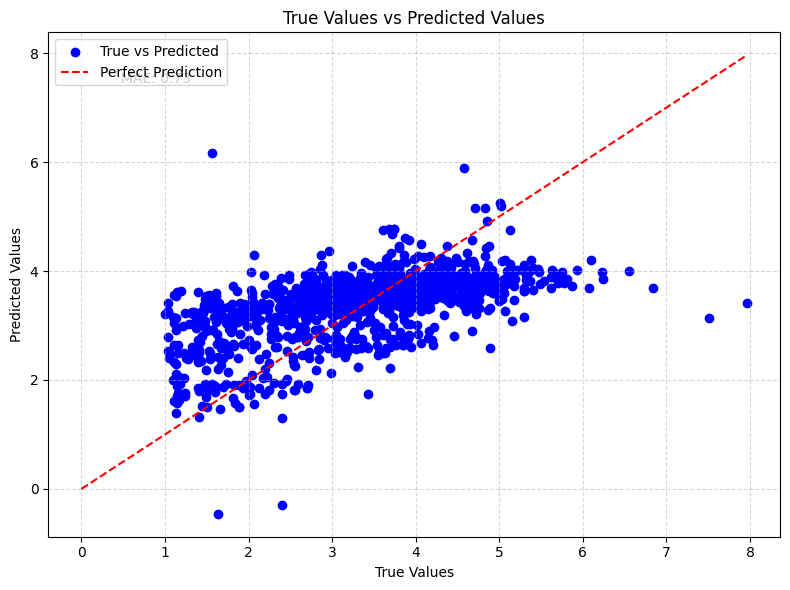

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='True vs Predicted')

# Adding a diagonal line representing perfect predictions
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.legend()

# Adding grid
plt.grid(True, linestyle='--', alpha=0.5)

# Adding text for indicating the performance
#mse = np.mean((true_values - predicted_values)**2)
plt.text(0.1, 0.9, f'MAE: {MAE:.2f}', transform=plt.gca().transAxes)

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

Let's try another ML model. GBR!

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
GBR_MAE = mean_absolute_error(y_test, gbr_pred) # mean_absolute_error between actual value and predicted value

# Let's print the error
print(f'The Mean Absolute Eroor is {GBR_MAE} V')

The Mean Absolute Eroor is 0.573551665978052 V


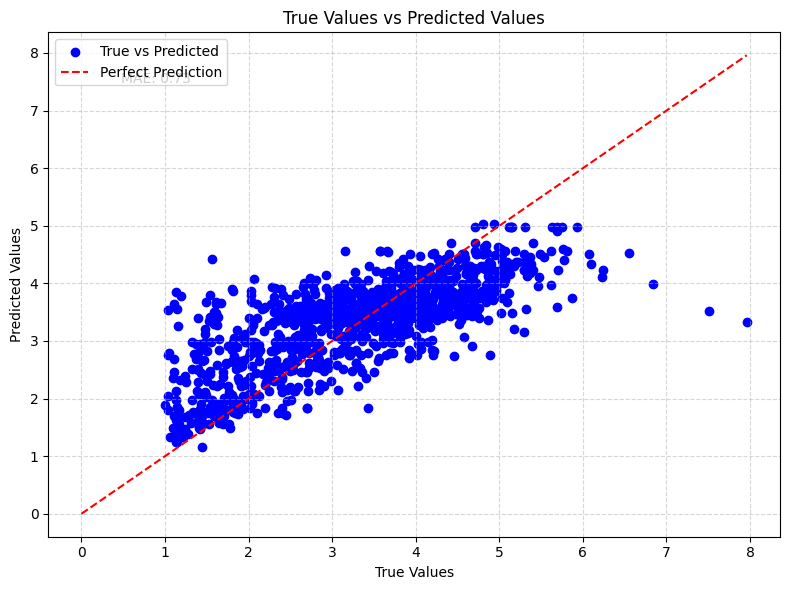

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gbr_pred, color='blue', label='True vs Predicted')

# Adding a diagonal line representing perfect predictions
max_val = max(np.max(y_test), np.max(gbr_pred))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.legend()

# Adding grid
plt.grid(True, linestyle='--', alpha=0.5)

# Adding text for indicating the performance
#mse = np.mean((true_values - predicted_values)**2)
plt.text(0.1, 0.9, f'MAE: {MAE:.2f}', transform=plt.gca().transAxes)

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

Let's try another ML model